In [1]:
import sys
import numpy as np

sys.path.append("library");


In [2]:
import FeatureSelection.Metrics.FeatureInformation as FI

InfA=FI.InformationAnalysis([1,2,3,3,4],[-1,-1,-1,-1,2],2,2)
print(InfA.MutualInformation())
print(InfA.JointEntropy())
print(InfA.EntropyA())
print(InfA.EntropyB())

print(InfA.Pab)
InfB=FI.InformationAnalysis(InfA.Pab)
print(InfB.MutualInformation())
print(InfB.JointEntropy())
print(InfB.EntropyA())
print(InfB.EntropyB())

0.17095059445466854
1.5219280948873621
0.9709505944546686
0.7219280948873623
[[0.4 0. ]
 [0.4 0.2]]
0.17095059445466845
1.5219280948873621
0.9709505944546686
0.7219280948873623


In [3]:
import DensityEstimation.KdeExtras as kext
from sklearn.neighbors import KernelDensity

XX=[[1,2],[2,3],[-1,2],[2,1],[3,3],[2,3]];
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(XX)
P=kext.kde_get2d_joint_prob(kde, -1,3,3,1,3,3)

print(P)

[[0.02942515 0.21742407 0.02942516]
 [0.05886019 0.22937672 0.08833849]
 [0.0295178  0.04143097 0.27620146]]


[[0.99950149 0.39836112 0.41009286 0.15824242 0.25484351 0.33870328
  0.17772408 0.2490158  0.34832244 0.37614053 0.38376065 0.24888738
  0.20013363 0.23070129 0.21513973]
 [0.39836112 0.99994785 0.33540416 0.21397775 0.18736407 0.46927783
  0.26350475 0.18291105 0.28449275 0.25470201 0.34724633 0.21319154
  0.23771314 0.23770066 0.18691931]
 [0.41009286 0.33540416 0.99872399 0.17497141 0.16484825 0.39683494
  0.25622612 0.23659991 0.33436147 0.25214309 0.27494609 0.21952002
  0.16866821 0.23047049 0.24802083]
 [0.15824242 0.21397775 0.17497141 0.99999911 0.24596768 0.3336803
  0.21857977 0.22725419 0.15808909 0.17446488 0.21292103 0.10754687
  0.20326095 0.13760972 0.12074481]
 [0.25484351 0.18736407 0.16484825 0.24596768 0.99998044 0.17415297
  0.30861259 0.21287738 0.2721264  0.18956918 0.23062346 0.15192348
  0.16526835 0.16159416 0.19858075]
 [0.33870328 0.46927783 0.39683494 0.3336803  0.17415297 0.99999595
  0.28501388 0.2815984  0.31020074 0.28735382 0.3495359  0.21504532
  0.3

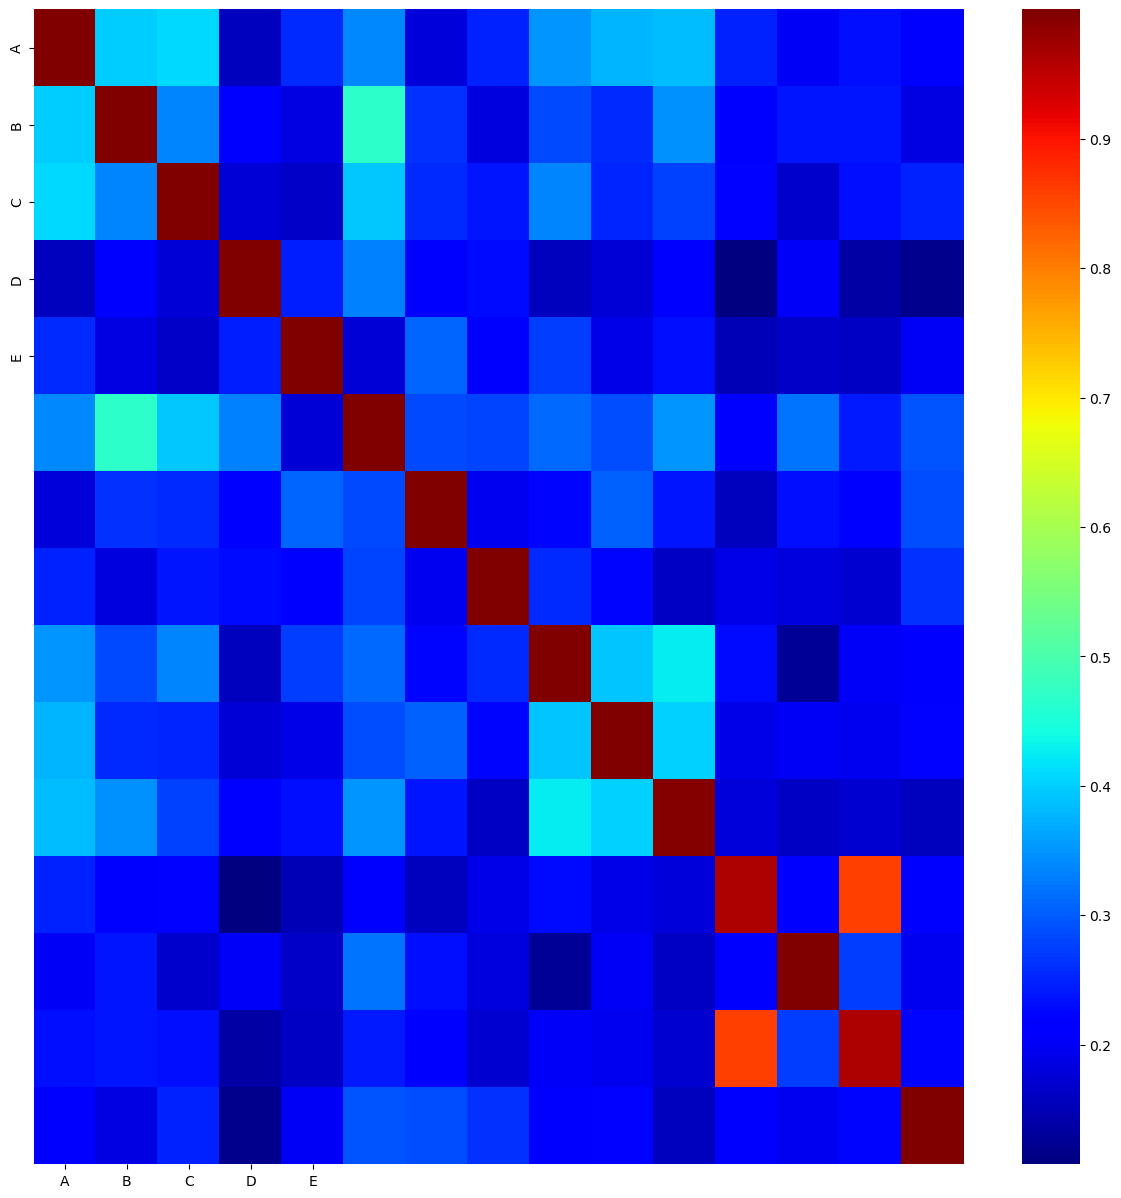

In [4]:
import FeatureSelection.Analysis.Information as AnI
import seaborn as sns
import matplotlib.pyplot as plt

DATA_COLUMNS=['A','B','C','D','E']
X=np.load('data-test.npy');

mat=AnI.all_against_all_mutual_inf(X,bandwidth=0.08,bins=10);
print(mat)

fig = plt.figure(figsize=(15, 15)) # width and height in inches
sns.heatmap(mat,xticklabels=DATA_COLUMNS, yticklabels=DATA_COLUMNS,cmap='jet')
plt.show()
fig.savefig('all_against_all.png')
